In [1]:
!pip install kaggle

# **Importing dependencies**


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# **Loading Data**

In [14]:
df=pd.read_csv('/content/IMDB Dataset.csv')

In [15]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [16]:
df.shape

(50000, 2)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [18]:
df['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


# **Preprocessing Data**

In [19]:
df.replace({"sentiment" : {"positive":1, "negative":0}}, inplace=True)

/tmp/ipython-input-19-1289902304.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"sentiment" : {"positive":1, "negative":0}}, inplace=True)


In [23]:
df.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


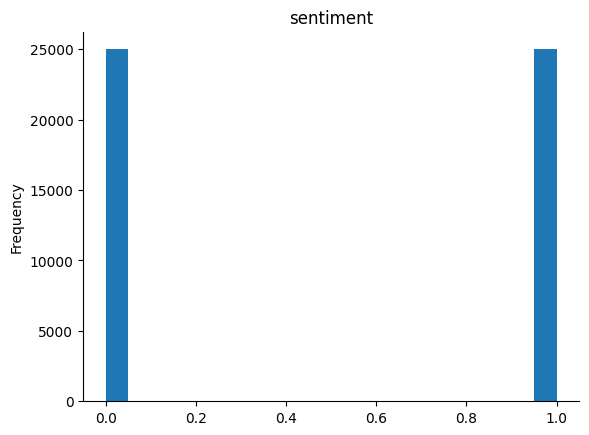

In [24]:
from matplotlib import pyplot as plt
df['sentiment'].plot(kind='hist', bins=20, title='sentiment')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [26]:
# split data into training data and test data
train, test=train_test_split(df, test_size=0.2, random_state=42)

In [28]:
print(train.shape)
print(test.shape)

(40000, 2)
(10000, 2)


In [29]:
# Tokenize text data
tokenizer=Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train["review"])
X_train=pad_sequences(tokenizer.texts_to_sequences(train["review"]), maxlen=200)
X_test=pad_sequences(tokenizer.texts_to_sequences(test["review"]), maxlen=200)

In [30]:
print(X_train)

[[1935    1 1200 ...  205  351 3856]
 [   3 1651  595 ...   89  103    9]
 [   0    0    0 ...    2  710   62]
 ...
 [   0    0    0 ... 1641    2  603]
 [   0    0    0 ...  245  103  125]
 [   0    0    0 ...   70   73 2062]]


In [31]:
print(X_test)

[[   0    0    0 ...  995  719  155]
 [  12  162   59 ...  380    7    7]
 [   0    0    0 ...   50 1088   96]
 ...
 [   0    0    0 ...  125  200 3241]
 [   0    0    0 ... 1066    1 2305]
 [   0    0    0 ...    1  332   27]]


In [32]:
Y_train=train["sentiment"]
Y_test=test["sentiment"]

In [33]:
print(Y_train)

39087    0
30893    0
45278    1
16398    0
13653    0
        ..
11284    1
44732    1
38158    0
860      1
15795    1
Name: sentiment, Length: 40000, dtype: int64


In [34]:
print(Y_test)

33553    1
9427     1
199      0
12447    1
39489    0
        ..
28567    0
25079    1
18707    1
15200    0
5857     1
Name: sentiment, Length: 10000, dtype: int64


# **Building the LSTM model**

In [35]:
# building the model
model=Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=200))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation="sigmoid"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [36]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [37]:
# compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

**Training the model**

In [38]:
model.fit(X_train, Y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 204s 392ms/step - accuracy: 0.7020 - loss: 0.5464 - val_accuracy: 0.8434 - val_loss: 0.3727
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 198s 392ms/step - accuracy: 0.8567 - loss: 0.3472 - val_accuracy: 0.8321 - val_loss: 0.3972
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 196s 380ms/step - accuracy: 0.8804 - loss: 0.2938 - val_accuracy: 0.8706 - val_loss: 0.3371
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 189s 378ms/step - accuracy: 0.9006 - loss: 0.2559 - val_accuracy: 0.8466 - val_loss: 0.3543
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 203s 380ms/step - accuracy: 0.9103 - loss: 0.2281 - val_accuracy: 0.8780 - val_loss: 0.3235
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 192s 383ms/step - accuracy: 0.9214 - loss: 0.2049 - val_accuracy: 0.8761 - val_loss: 0.3157
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 207s 395ms/step - accuracy: 0.9323 - loss: 0.1728 - val_accuracy: 0.8784 - val_loss: 0.3242
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 196s 393ms/step - accuracy: 0.9419 -

# **Model evaluation and prediction**

In [39]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 36s 111ms/step - accuracy: 0.8822 - loss: 0.3471
Test Loss: 0.34584662318229675
Test Accuracy: 0.8827999830245972


In [40]:
def predict_sentiment(review):
  # tokenize and pad the review
  sequence=tokenizer.texts_to_sequences([review])
  padded_sequence=pad_sequences(sequence, maxlen=200)
  prediction=model.predict(padded_sequence)
  sentiment="positive" if prediction[0][0] > 0.5 else "negative"
  return sentiment

In [41]:
predict_sentiment("This movie was fantastic and amazing")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 614ms/step


'positive'

In [42]:
predict_sentiment("I loved the movie")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


'positive'

In [43]:
predict_sentiment("A thrilling adventure with stunning visual")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


'positive'

In [45]:
predict_sentiment("Overall long and slow. ")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


'negative'

In [46]:
predict_sentiment("The direction of the movie was laggy and the story was inconsistent")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


'negative'

In [47]:
import joblib
joblib.dump(tokenizer, "tokenizer.pkl")

['tokenizer.pkl']

In [48]:
from google.colab import files
files.download('tokenizer.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [49]:
model.save('pred_model.keras')

In [50]:
from google.colab import files
files.download('pred_model.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>